In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

# Alumno: Óscar Mirones Alonso y Pablo Menezo Camino

# Introduction to ConvNets: Classifying handwritten numbers


Let's take a look at a simple example of a convnet. We will use it to classify the MNIST dataset, which is an open dataset containing handwritten numbers. 

![Handwritten numbers from the MNIST dataset](http://corochann.com/wp-content/uploads/2017/02/mnist_plot.png)

Let's create a first basic convnet. It's a stack of 'Conv2D' and 'MaxPooling2D' layers. 
The important thing to note is that a convnet takes as input tensors of size `(image_height, image_width, image_channels)`. 
To do this we must first find out the size of the images in our dataset. 

The network must have the following layers:

- A convolutional layer (Conv2D) with 32 3x3 filters and relu activation. In this first layer you must indicate the size of the input (input_shape).
- A second layer of Max Pooling (MaxPooling2D) of 2x2
- A third convolutional layer with 64 3x3 filters and relu activation
- A fourth layer of 2x2 Max Pooling (MaxPooling2D)
- A fifth convolutional layer of 64 3x3 filters and relu activation

You'll know you've done it right when the model.summary() output is:

![imagen_output.png](https://github.com/laramaktub/MachineLearningI/blob/master/imagen_output.png?raw=true)


In [2]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))


In [3]:
model.summary() #verification

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


You can see above that the output of each Conv2D and MaxPooling2D layer is a 3D tensor of dimensions (height, width, channels). The width and height tend to decrease as we go deeper into the network. The number of channels is controlled by the first argument passed to the Conv2D layers (e.g. 32 or 64).

The next step would be to give our last tensor (of dimensions (3, 3, 64)) as input to a densely connected network. These classifiers process vectors, which are 1D, while our output is a 3D tensor. So first we will have to flatten our 3D output and convert it to 1D and then add a few dense layers:

- First flatten the output.
- Add a first layer of 64 neurons and relu activation
- Add a last layer of 10 neurons (as many as you can sort) and softmax activation
- You'll know you've done well when the summary looks like this:

![imagen_output_flat.png](https://github.com/laramaktub/MachineLearningI/blob/master/imagen_output_flat.png?raw=true)

In [4]:
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Activation

In [5]:
model.add(Flatten())
model.summary()#to see if flatten works

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
__________________________________________________

In [6]:
model.add(Dense(64,activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

As you can see, our dimensional output `(3, 3, 64)` has been flattened into a vector of dimension `(576,)`, before entering the two dense layers.

We are now going to train our network with the images from the MNIST dataset.

We then load the dataset and put it into vectors: train_images, train_labels, test_images, test_labels

Before you continue, print:

- What is the size of the training dataset?
- What does the training dataset look like?
- What do the training labels look like?
- Print the fourth image of the training dataset


In [7]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()



In [8]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [9]:
print(train_images[3])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  124 253 255  63   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  96
  244 251 253  62   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 127
  251 251 253  62   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

Cada elemento del dataset de train se trata de la representación numérica de los píxeles. En este caso vemos que en las zonas donde hay un número grande denota que ese píxel está coloreado, mientras que donde hay 0 no está coloreado. En este caso parece ser una línea diagonal que puede que represente a el número 1.

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

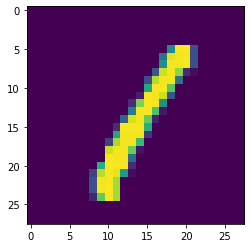

In [11]:
plt.imshow(train_images[3])

In [12]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Se trata de un array donde cada elemento índica a que número se corresponde la etiqueta.

Next you will give the appropriate shape to the training and test datasets in order to put them into the neural network. Convert the labels, which right now are numbers, into their categorical form.

In [14]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)



Compile the model indicating what the training data and its labels are. Using the optimizer "rmsprop" and as a loss function use the categorical cross entropy.
Then train the model for 5 epochs and a batch size of 64.

In [15]:
model.compile(optimizer='rmsprop' ,loss='categorical_crossentropy' , metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5 ,batch_size=64 )

Epoch 1/5
60000/60000 [==============================] - 78s 1ms/step - loss: 0.9392 - accuracy: 0.6838
Epoch 2/5
60000/60000 [==============================] - 69s 1ms/step - loss: 0.2574 - accuracy: 0.9198
Epoch 3/5
60000/60000 [==============================] - 69s 1ms/step - loss: 0.1409 - accuracy: 0.9561
Epoch 4/5
60000/60000 [==============================] - 68s 1ms/step - loss: 0.0972 - accuracy: 0.9698
Epoch 5/5
60000/60000 [==============================] - 72s 1ms/step - loss: 0.0776 - accuracy: 0.9751


Let's evaluate the model with the test images:

In [16]:
test_loss, test_acc = model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 3s 270us/step


In [19]:
print('test accuracy: ',test_acc)
print('test loss:', test_loss)

test accuracy:  0.9747999906539917
test loss: 0.07913698895331472


Create an image with a handwritting number and check the prediction. Try with several numbers ...does it work properly?

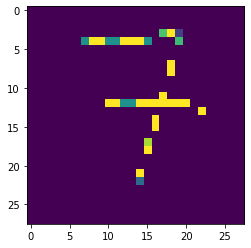

In [58]:
from keras.preprocessing import image
import numpy as np
from matplotlib import pyplot as plt

img_width=28
img_height=28

img = image.load_img('siete.png', target_size=(img_width, img_height),grayscale=True)
x= image.img_to_array(img)
x = np.expand_dims(x, axis=0)
plt.imshow(img)




In [35]:
model.save('net_numbers.h5')

Load the model that you just saved and make a prediction (predict_classes) with the number you just generated. 


In [38]:
from keras.models import load_model

In [39]:
model = load_model('net_numbers.h5')

In [59]:
model.predict(x)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

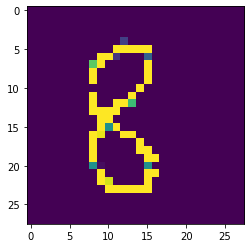

In [76]:
img = image.load_img('ocho.png', target_size=(img_width, img_height),grayscale=True)
x= image.img_to_array(img)
x = np.expand_dims(x, axis=0)
plt.imshow(img)

In [77]:
model.predict(x)

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

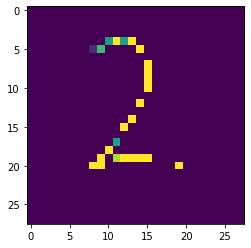

In [60]:
img = image.load_img('dos.png', target_size=(img_width, img_height),grayscale=True)
x= image.img_to_array(img)
x = np.expand_dims(x, axis=0)
plt.imshow(img)

In [61]:
model.predict(x)

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

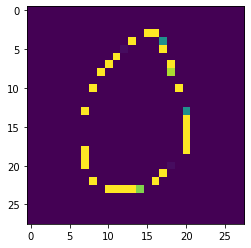

In [62]:
img = image.load_img('cero.png', target_size=(img_width, img_height),grayscale=True)
x= image.img_to_array(img)
x = np.expand_dims(x, axis=0)
plt.imshow(img)

In [63]:
model.predict(x)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

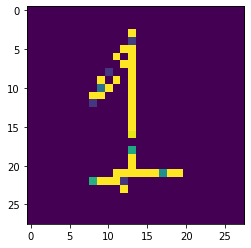

In [72]:
img = image.load_img('uno.png', target_size=(img_width, img_height),grayscale=True)
x= image.img_to_array(img)
x = np.expand_dims(x, axis=0)
plt.imshow(img)

In [73]:
model.predict(x)

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

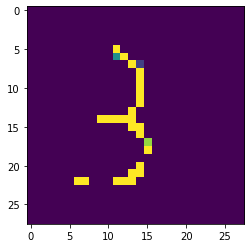

In [78]:
img = image.load_img('tres.png', target_size=(img_width, img_height),grayscale=True)
x= image.img_to_array(img)
x = np.expand_dims(x, axis=0)
plt.imshow(img)

In [79]:
model.predict(x)

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

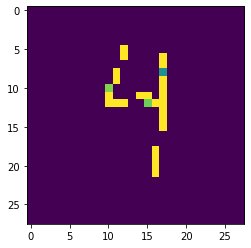

In [80]:
img = image.load_img('cuatro.png', target_size=(img_width, img_height),grayscale=True)
x= image.img_to_array(img)
x = np.expand_dims(x, axis=0)
plt.imshow(img)

In [81]:
model.predict(x)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

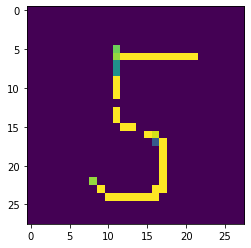

In [82]:
img = image.load_img('cinco.png', target_size=(img_width, img_height),grayscale=True)
x= image.img_to_array(img)
x = np.expand_dims(x, axis=0)
plt.imshow(img)

In [83]:
model.predict(x)

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

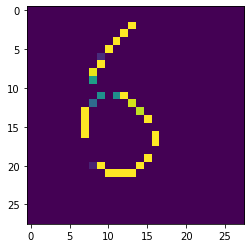

In [90]:
img = image.load_img('seis.png', target_size=(img_width, img_height),grayscale=True)
x= image.img_to_array(img)
x = np.expand_dims(x, axis=0)
plt.imshow(img)

In [91]:
model.predict(x)

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

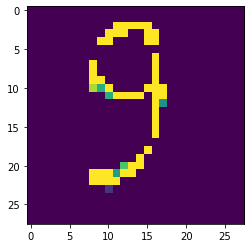

In [98]:
img = image.load_img('nueve.png', target_size=(img_width, img_height),grayscale=True)
x= image.img_to_array(img)
x = np.expand_dims(x, axis=0)
plt.imshow(img)

In [99]:
model.predict(x)

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Observamos que en general suele acertar, aunque hay números en los que falla. Por ejemplo el número 8 le confunde con el 2 debido a que tienen similitudes en las secciones curvas de los números. Puede que sea esta cuestión la que esté engañando al algoritmo. El 4 le confunde con un 7, dado que el 7 dibujado con el 4 tiene practicamente una estructura similar salvo en la parte superior de la figura. Y por último, también ha tenido problemas con el 9 que lo confunde con el 4 por el mismo motivo, ya que son similares salvo la estructura curva en la parte superior del nueve. Para que mejorase el rendimiento con los números escritos a mano, debería ser sometido a un entrenamiento con muchas muestras de números escritos a mano por el usuario.